# Introducción a Jupyter Notebook, Pandas, Matplotlib, etc.

En esta hoja introduciremos la forma de trabajar con Jupyter Notebook/Google Colab. Veremos cómo los distintos elementos de las librerías de Python interactúan con el notebook para mostrar imágenes, gráficos, etc. También, en las siguientes sesiones los usaremos para acceder a conexiones SQL y a bases de datos NoSQL.

Enlaces a otros tutoriales introductorios (que también se centran en tratamiento de datos para Big Data): [1](https://github.com/CharlestonDataScience/PythonNotebooks/blob/master/notebooks/tutorial_01/pandas_tutorial.ipynb) y [2](https://github.com/phelps-sg/python-bigdata/blob/master/src/main/ipynb/pandas.ipynb), entre otros muchos.

## Jupyter/Colab Notebook

Los *Notebooks* contienen una mezcla de texto y código, y se pueden ir ejecutando paso a paso. En general utilizaremos el lenguaje Python en su versión 3, así que las hojas son en realidad un programa Python que se puede ejecutar en orden, junto con imágenes y texto explicativo adjunto.

Al pulsar Ctrl+Intro en una celda, se ejecuta el código de la celda y se muestra el la siguiente celda. Al pulsar Shift+Intro se ejecuta la celda actual y pasa automáticamente a la siguiente.

Existen también "magics", que sirven para obtener información de la hoja, o ejecutar comandos especiales. Por ejemplo, órdenes de shell, como en la siguiente celda. Hay varios tutoriales Online. Por ejemplo: [Tutorial](https://github.com/esc/scipy2013-tutorial-numpy-ipython/blob/master/ipython.ipynb).

In [ ]:
!uname -a

In [ ]:
%lsmagic

A continuación mostramos los paquetes que usaremos regularmente para tratar datos, `pandas`, `numpy`, `matplotlib`. Al ser un programa en Python, se pueden importar paquetes que seguirán siendo válidos hasta el final del _notebook_.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

Lo siguiente hace que los gráficos se muestren inline. Para figuras pequeñas se puede utilizar unas figuras interactivas que permiten zoom, usando `%maplotlib nbagg`.

In [ ]:
%matplotlib inline
matplotlib.style.use('ggplot')

## Numpy

Numpy es una de las librerías más utilizadas en Python, y ofrece un interfaz sencillo para operaciones eficientes con números, _arrays_ y matrices. Numpy se utilizará de apoyo muchas veces que haya que hacer procesamiento local de datos recogidos de una base de datos, o como preparación para la graficación de datos. En la celda siguiente se muestra un vídeo introductorio, y también se puede acceder a tutoriales online: [Tutorial](https://github.com/esc/scipy2013-tutorial-numpy-ipython/blob/master/operations.ipynb).

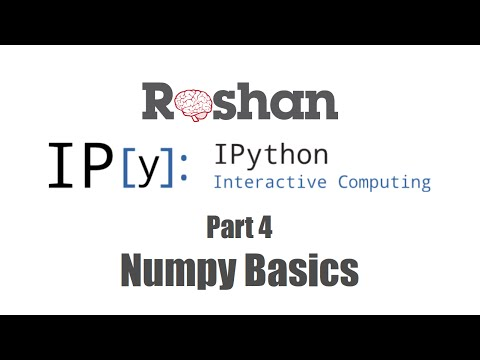

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('o8fmjaW9a0A') # Yes, it can also embed youtube videos.

Numpy permite generar y procesar arrays de datos de forma muy eficiente. A continuación se muestran algunos ejemplos:

In [ ]:
a = np.array([4,5,6])
print(a.shape)
print(a[0])
a[0] = 9
print (a)

In [ ]:
np.arange(10)

In [ ]:
np.arange(1,20)

También arrays multidimensionales:

In [ ]:
a = np.zeros((2,2))
print (a)

In [ ]:
a.ndim

In [ ]:
a.dtype

In [ ]:
b = np.random.random((2,2))
print (b)

In [ ]:
a = np.random.random((2,2))
print(a)

Se pueden aplicar funciones sobre todo el array o matriz, y el resultado será una matriz idéntica con el operador aplicado. Similar a lo que ocurre con la operación `map` de algunos lenguajes de programación (incluído Python):

In [ ]:
print (a >= .5)

También se pueden _filtrar_ los elementos de un array o matriz que cumplan una condición. Para eso se utiliza el operador de indización (`[]`) con una expresión booleana.

In [ ]:
print (a[a >= .5])

¿Por qué usar Numpy? 

`%%capture` captura la salida de la ejecución de la celda en la variable dada como parámetro. Después se puede imprimir.

`%timeit` se utiliza para ejecutar varias veces una instrucción y calcular un promedio de su duración.

In [ ]:
%%capture timeit_output

%timeit l1 = range(1,1000)

%timeit l2 = np.arange(1,1000)

In [ ]:
print(timeit_output)

In [ ]:
x = np.array([[1,2],[3,4]])

print (np.sum(x))  # Compute sum of all elements; prints "10"
print (np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print (np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

In [ ]:
x * 2

In [ ]:
x ** 2

`numpy` tiene infinidad de funciones, por lo que sería interesante darse una vuelta por su documentación: https://docs.scipy.org/doc/.

## Matplotlib

Matplotlib permite generar gráficos de forma sencilla. Lo veremos aquí primero conectado sólo con `Numpy` y después conectado con `Pandas`.

In [ ]:
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)
plt.subplot()
# Plot the points using matplotlib
plt.plot(x, y)
plt.show()

In [ ]:
plt.subplot(211)
plt.plot(range(12))
plt.subplot(212, facecolor='y')
plt.plot(range(100))
plt.show()

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

## Pandas

Tutoriales: [1](http://pandas.pydata.org/pandas-docs/version/0.18.1/tutorials.html), [2](https://dev.socrata.com/blog/2016/02/01/pandas-and-jupyter-notebook.html), [3](http://nikgrozev.com/2015/12/27/pandas-in-jupyter-quickstart-and-useful-snippets/).

Pandas permite gestionar conjuntos de datos n-dimensionales de diferentes formas, y también conectarlo con matplotlib para hacer gráficas.

Los conceptos principales de Pandas son los `Dataframes` y las `Series`. La diferencia entre ambas es que la serie guarda sólo una serie (una columna o una fila, depende de como se quiera interpretar), mientras que un Dataframe guarda estructuras multidimensaionales agregando series.

Ambas tienen una (o varias) "columna fantasma", que sirve de índice, y que se puede acceder con `d.index` (tanto si `d` es una serie o un dataframe). Si no se especifica un índice, se le añade uno virtual numerando las filas desde cero. Además, los índices pueden ser multidimensionales (por ejemplo, tener un índice por mes y dentro uno por dia de la semana).

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

In [ ]:
ts.describe()

In [ ]:
ts = ts.cumsum()
ts.plot();

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

df = df.cumsum()

df.plot();

Se puede hacer plot también de una columna contra otra.

In [ ]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df3))))
df3.plot(x='A', y='B');

Valores incompletos. Si no se establecen, se pone a `NaN` (_not a number_). 

In [ ]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

`fillna()` permite cambiar el valor de los datos faltantes.

In [ ]:
df.fillna(0)

In [ ]:
pd.DataFrame(d, index=['d', 'b', 'a'])

In [ ]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

A continuación se muestra un ejemplo de uso de Pandas para leer datos y procesarlos en un Dataframe.

El primer ejemplo completo carga desde el fichero `swift-question-dates.txt.gz` las fechas de las preguntas en Stackoverflow que contienen el tag "swift".

La función `read_csv` es capaz de leer cualquier fichero CSV y lo convierte en un "Dataframe", una estructura de tabla que guarda también los nombres y los tipos de las columnas, así como un índice por el que se identificarán las tablas. La lista incluye la fecha en donde se produjo una pregunta con el tag "swift". Como los datos en sí son las fechas, hacemos que la columna de fechas haga a su vez de índice.

In [ ]:
df = pd.read_csv('https://github.com/dsevilla/bdge/raw/master/intro/swift-question-dates.txt.gz',
                 header=None,
                 names=['date'],
                 compression='gzip',
                 parse_dates=['date'],
                 index_col='date')

In [ ]:
df

De la fecha, extraer sólo la fecha (no la hora, que no nos interesa).

In [ ]:
df.index = df.index.date

Añadimos una columna de todo "1" para especificar que cada pregunta cuenta como 1.

In [ ]:
df['Count'] = 1
df

A los Dataframe de Pandas también se les puede aplicar operaciones de agregación, como `groupby` o `sum`. Finalmente, la funcion `plot()` permite mostrar los datos en un gráfico.

In [ ]:
accum = df.groupby(df.index).sum()
accum

In [ ]:
# Los 30 primeros registros que tengan un número de preguntas mayor que 20 por día.
accum = accum[accum.Count > 20][:30]
accum

In [ ]:
accum[accum.Count > 30][:30].plot.bar()

A continuación comprobamos con la página de la Wikipedia cuándo apareció el lenguaje Swift:

In [ ]:
!pip install lxml

In [ ]:
dfwiki = pd.read_html('https://en.wikipedia.org/wiki/Swift_(programming_language)',attrs={'class': 'infobox vevent'})

In [ ]:
dfwiki[0]

In [ ]:
firstdate = dfwiki[0][1][4]
firstdate

In [ ]:
from dateutil.parser import parse
dt = parse(firstdate.split(';')[0])
print (dt.date().isoformat())
print (accum.index[0].isoformat())

assert dt.date().isoformat() == accum.index[0].isoformat()

A continuación se muestra cómo ubicar posiciones en un mapa con el paquete `folium`. Se muestra también cómo acceder a distintas posiciones del Dataframe con `iloc`, `loc`, etc.

In [ ]:
# cargar municipios y mostrarlos en el mapa
df = pd.read_csv('https://github.com/dsevilla/bdge/raw/master/intro/municipios-2017.csv.gz',header=0,compression='gzip')

In [ ]:
df.head()

In [ ]:
df.iloc[0]

In [ ]:
df.iloc[0].NOMBRE_ACTUAL

In [ ]:
df.loc[:,'NOMBRE_ACTUAL']

In [ ]:
df.iloc[:,0]

In [ ]:
df.PROVINCIA

In [ ]:
df[df.PROVINCIA == 'A Coruña']

In [ ]:
mula = df[df.NOMBRE_ACTUAL == 'Mula'].iloc[0]
mula

In [ ]:
(mula_lat,mula_lon) = (mula.LATITUD_ETRS89, mula.LONGITUD_ETRS89)
(mula_lat,mula_lon)

El paquete `folium` permite generar mapas de posiciones. El siguiente ejemplo centra un mapa en Mula y pone un marcador con su nombre:

In [ ]:
!pip install folium

In [ ]:
import folium

map = folium.Map(location=[mula_lat, mula_lon],zoom_start=10)
folium.Marker(location = [mula_lat, mula_lon], popup="{} ({} habitantes)".format(mula.NOMBRE_ACTUAL,mula.POBLACION_MUNI)).add_to(map)

map

## Ejercicio

Mostrar con `folium` marcadores para cada pueblo de A Coruña y Murcia. Se pueden usar las funciones `itertuples()` o `iterrows()` de un `Dataframe` para recorrer los elementos del mismo.